# NAILDOH - IED Merge 3 (Combined)

## Resources

In [9]:
# Libraries
library(tidyverse) # for data manipulation

# Functions
factorize <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "character")) # that looks for variables with the character class 
      df[[i]] = as.factor(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

unfactorize <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "factor")) # that looks for variables with the character class 
      df[[i]] = as.character(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

## Prep IED

In [10]:
# Data
df <- read.csv("20240604_PhD_Letters.csv")
dim(df)

[1] 686  18

### Checking / correcting

In [11]:
#df[is.na(df$docyear),]

#df[grepl("Sm.th", df$docauthorname),]

#df[df$docauthorid=="per0032629",]
#df[is.na(df$docyear),]

#df[df$docid=="S316-D180",]

#vals <- c("S2344-D124")
#df[df$docid %in% vals,]

I set the cutoff for short letters at 475 characters with spaces, as described <a href="https://wellbeinginlifewriting.wordpress.com/2024/02/19/782/">here</a>.

In [12]:
vals <- c("S2344-D124", # Year unknown
         "S2344-D091", # Business
         "S2344-D083", # Business
         "S2344-D076", # Business
         "S2344-D057", # Business
         "S2344-D051", # Business
         "S2344-D040", # Business
         "S6210-D208", # Too short
         "S6210-D046", # Too short
         "S6210-D075" # Too short
         )
df <- df[!df$docid %in% vals, ]
dim(df)

[1] 676  18

In [13]:
# Checking to make sure csv matches folder list.

csv <- sort(unique(df$docid))

# make list of doc ids in folder
WD <- getwd()
setwd(WD)
files <- list.files("20240604_PhD_Letters")
folder <- sort(sub('.txt', '', files))

print("in csv but not in folder")
setdiff(csv, folder) 

print("in folder but not in csv")
setdiff(folder, csv) 

[1] "in csv but not in folder"


character(0)

[1] "in folder but not in csv"


[1] "cleaned"

In [14]:
glimpse(df)

Rows: 676
Columns: 18
$ docid          <chr> "S2344-D043", "S2344-D052", "S2344-D053", "S2344-D055",…
$ docyear        <int> 1842, 1853, 1853, 1853, 1853, 1854, 1854, 1854, 1854, 1…
$ docmonth       <int> 11, 9, 10, 12, 12, 1, 2, 4, 4, 6, NA, 12, 1, 7, 8, 11, …
$ authorName     <chr> "Susannah Strickland Moodie", "Susannah Strickland Mood…
$ docauthorid    <chr> "per0004772", "per0004772", "per0004772", "per0004772",…
$ authorLocation <chr> "Canada", "Canada", "Canada", "Canada", "Canada", "Cana…
$ authorGender   <chr> "F", "F", "F", "F", "F", "F", "F", "F", "F", "F", "F", …
$ nationalOrigin <chr> "English", "English", "English", "English", "English", …
$ irish          <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,…
$ otherUK        <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, T…
$ relMin         <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,…
$ catholic       <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,…
$ otherChristian <

In [15]:
write.csv(df, "20240606_PhD_Letters.csv", row.names=FALSE)

## Summary Statistics

In [17]:
letters <- read.csv("20240606_PhD_Letters.csv")
nrow(letters)
summary(factorize(letters))

[1] 676

     docid        docyear        docmonth                           authorName 
 20910  :  1   Min.   :1770   Min.   : 1.000   Sarah Stretch Harris      :168  
 21062  :  1   1st Qu.:1849   1st Qu.: 3.000   Susannah Strickland Moodie: 81  
 21324  :  1   Median :1861   Median : 7.000   Mary Cumming              : 28  
 21334  :  1   Mean   :1859   Mean   : 6.716   William J. Weir           : 16  
 21354  :  1   3rd Qu.:1872   3rd Qu.:10.000   Isabella Weir Moore       : 15  
 21470  :  1   Max.   :1912   Max.   :12.000   (Other)                   :315  
 (Other):670                  NA's   :7        NA's                      : 53  
     docauthorid  authorLocation authorGender  nationalOrigin   irish        
 per0038009:168   Canada:388     F:449        English :316    Mode :logical  
 per0004772: 81   USA   :288     M:227        Irish   :293    FALSE:383      
 IED0661   : 28                               Scottish: 41    TRUE :293      
 IED0958   : 16                               We

In [18]:
repeatAuthors <- letters %>% # Take the dataframe
filter(!is.na(docauthorid)) %>% 
count(docauthorid, sort = TRUE) 

repeatAuthors %>% # Count the number of letters per authors
count(n > 1) # Count the number of series

repeatAuthors  %>% 
filter(n>1)

n > 1,n
<lgl>,<int>
FALSE,113
TRUE,61


docauthorid,n
<chr>,<int>
per0038009,168
per0004772,81
IED0661,28
IED0958,16
IED0107,15
IED0403,12
IED0957,12
per0027000,12
per0038008,11


In [19]:
#What is the gender breakdown by doc and by author for letters

temp <- letters %>% #Create new variable for the collection of letters
reframe(authorGender) #summarized by gender
table(temp$authorGender) #plot
prop.table(as.matrix(table(temp$authorGender)), 2)*100

temp <- letters %>% #Create new variable for the writer pool
reframe(authorGender, group_by=docauthorid) %>% #summarized by gender and grouped by author
unique() #unique values only
table(temp$authorGender) #plot author breakdown
prop.table(as.matrix(table(temp$authorGender)), 2)*100 

# How many authors are NA for gender?
letters %>% 
filter(is.na(authorGender)) %>% 
select(docauthorid) %>% 
unique() %>% 
nrow()


  F   M 
449 227 

F,66.42012
M,33.57988



 F  M 
79 95 

F,45.4023
M,54.5977


[1] 0

In [20]:
#What is the country of origin breakdown by doc and by author for letters

temp <- letters %>% #Create new variable for the collection of letters
reframe(irish) #summarized by gender
table(temp$irish) #plot
prop.table(as.matrix(table(temp$irish)), 2)*100

temp <- letters %>% #Create new variable for the writer pool
reframe(irish, group_by=docauthorid) %>% #summarized by gender and grouped by author
unique() #unique values only
table(temp$irish) #plot author breakdown
prop.table(as.matrix(table(temp$irish)), 2)*100 

# How many authors are NA for irish?
letters %>% 
filter(is.na(irish)) %>% 
select(docauthorid) %>% 
unique() %>% 
nrow()


FALSE  TRUE 
  383   293 

FALSE,56.6568
TRUE,43.3432



FALSE  TRUE 
   80    94 

FALSE,45.97701
TRUE,54.02299


[1] 0

In [21]:
#What is the location breakdown by doc and by author for letters

temp <- letters %>% #Create new variable for the collection of letters
reframe(authorLocation) #summarized by location
table(temp$authorLocation) #plot
prop.table(as.matrix(table(temp$authorLocation)), 2)*100

temp <- letters %>% #Create new variable for the writer pool
reframe(authorLocation, group_by=docauthorid) %>% #summarized by location and grouped by author
unique() #unique values only
table(temp$authorLocation) #plot
prop.table(as.matrix(table(temp$authorLocation)), 2)*100 

# How many authors are NA for authorLocation?
letters %>% 
filter(is.na(authorLocation)) %>% 
select(docauthorid) %>% 
unique() %>% 
nrow()


Canada    USA 
   388    288 

Canada,57.39645
USA,42.60355



Canada    USA 
    56    120 

Canada,31.81818
USA,68.18182


[1] 0

In [22]:
# Crosstabulations

table(letters$authorGender, letters$authorLocation)

temp <- letters %>% 
select(docauthorid, irish, authorLocation, authorGender)  %>% 
unique()

table(temp$irish, temp$authorGender)
round(prop.table(table(temp$irish, temp$authorGender)), digits = 2)

table(temp$authorLocation, temp$authorGender)
round(prop.table(table(temp$authorLocation, temp$authorGender)), digits = 2)

table(temp$authorLocation, temp$irish)
round(prop.table(table(temp$authorLocation, temp$irish)), digits=2)

   
    Canada USA
  F    292 157
  M     96 131

       
         F  M
  FALSE 12 69
  TRUE  67 28

       
           F    M
  FALSE 0.07 0.39
  TRUE  0.38 0.16

        
          F  M
  Canada 19 37
  USA    60 60

        
            F    M
  Canada 0.11 0.21
  USA    0.34 0.34

        
         FALSE TRUE
  Canada    32   24
  USA       49   71

        
         FALSE TRUE
  Canada  0.18 0.14
  USA     0.28 0.40

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1770    1849    1861    1859    1872    1912 

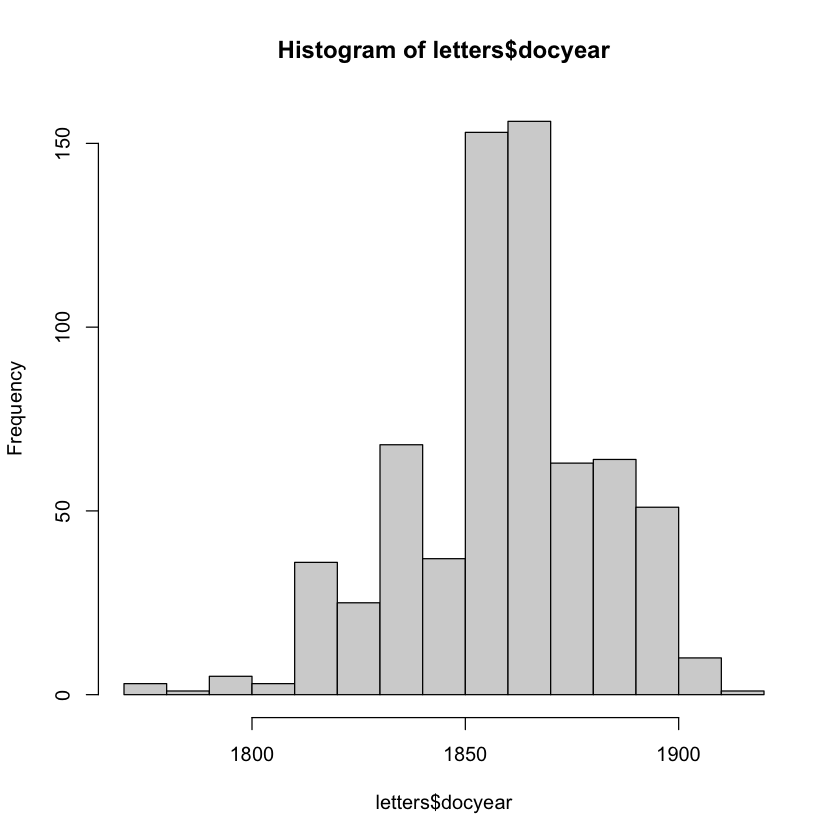

In [23]:
#What is the breakdown for year of writing

hist(letters$docyear)
summary(letters$docyear)

[1] 7


 1  2  3  4  5  6  7  8  9 10 11 12 
66 54 49 42 57 53 54 43 50 58 67 76 

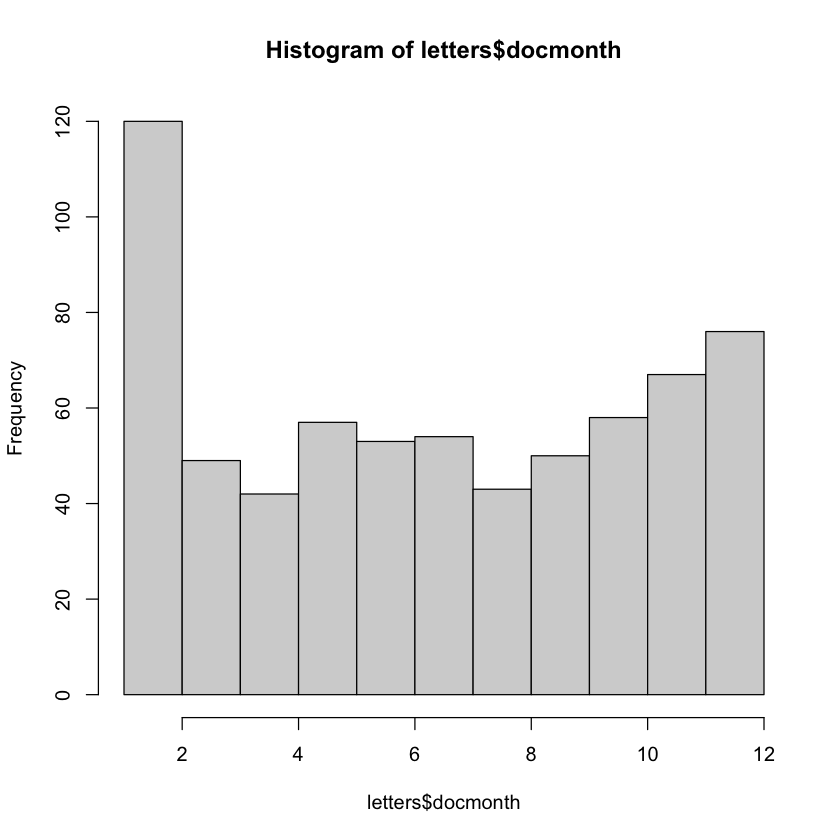

In [24]:
#What is the breakdown for month of writing

hist(letters$docmonth)
sum(is.na(letters$docmonth))
table(letters$docmonth)

In [25]:
#What is the breakdown for catholic

sum(is.na(letters$catholic))
sum(is.na(letters$catholic))/sum(nrow(letters))

letters %>% 
filter(is.na(catholic)) %>% 
select(docauthorid) %>% 
unique() %>% 
nrow()

149/length(unique(letters$docauthorid))

[1] 337

[1] 0.4985207

[1] 149

[1] 0.8563218

In [26]:
#What is the breakdown for labour
sum(is.na(letters$L))
sum(is.na(letters$L))/sum(nrow(letters))

letters %>% 
filter(is.na(L)) %>% 
select(docauthorid) %>% 
unique() %>% 
nrow()

124/length(unique(letters$docauthorid))

[1] 291

[1] 0.4304734

[1] 124

[1] 0.7126437

## References

Conway, A. (1961). The Welsh in America: Letters from the immigrants. University of Minnesota Press. https://www.jstor.org/stable/10.5749/j.cttts8t0.

Fitzpatrick, D. (1999). Ireland and empire. In W. R. Louis & A. N. Porter (Eds.), The Oxford history of the British empire: The nineteenth century (pp. 494–521). Oxford University Press. https://doi.org/10.1093/acprof:oso/9780198205654.001.0001


Harkness, D. A. E. (1931). Irish emigration. In W. F. Willcox (Ed.), International migrations: Vol. II (Interpretations) (pp. 261–282). National Bureau of Economic Research. https://www.nber.org/books-and-chapters/international-migrations-volume-ii-interpretations/irish-emigration

Turnbull, T. (1914). T. Turnbull’s travels from the United States across the plains to California (F. L. (Frederic L. Paxson & R. G. Thwaites, Eds.). Madison, Published for the State Historical Society of Wisconsin. http://archive.org/details/tturnbullstravel00turnrich
